# Data Cleaning practice: Canada LinkedIn Jobs

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import folium
import seaborn as sns
import plotly
import random

In [3]:
data = 'linkedin-jobs-canada.csv'

df = pd.read_csv(data)

In [4]:
df.shape

(2773, 9)

In [5]:
df.head()

,title,company,description,onsite_remote,salary,location,criteria,posted_date,link
0,Data Analyst,Axonify,Axonify is an intelligent workforce enablement...,onsite,NaN,"Waterloo, Ontario, Canada","[{'Seniority level': 'Entry level'}, {'Employm...",2022-10-24,https://ca.linkedin.com/jobs/view/data-analyst...
1,Data Analyst,B3 Systems,The ideal candidate will use their passion for...,onsite,NaN,"Toronto, Ontario, Canada",[{'Employment type': 'Full-time'}],2022-11-18,https://ca.linkedin.com/jobs/view/data-analyst...
2,Data Analyst,Wood Mackenzie,Company DescriptionWood Mackenzie is the globa...,onsite,NaN,"Calgary, Alberta, Canada","[{'Seniority level': 'Associate'}, {'Employmen...",2022-11-18,https://ca.linkedin.com/jobs/view/data-analyst...
3,Data Analyst,LOFT Community Services,1 Part Time Permanent PositionDATE: November 1...,onsite,NaN,"Toronto, Ontario, Canada",[{'Employment type': 'Part-time'}],2022-11-17,https://ca.linkedin.com/jobs/view/data-analyst...
4,Data Analyst,NAM Info Inc,"Position: Data AnalystWork Locations: Toronto,...",onsite,NaN,"Toronto, Ontario, Canada","[{'Seniority level': 'Mid-Senior level'}, {'Em...",2022-11-08,https://ca.linkedin.com/jobs/view/data-analyst...


In [6]:
#Delete not relevant columns
#Salary is dropped because is a NaN column. Later ['salary'] will be added with random numbers for the practice
df.drop(columns=['salary', 'description', 'criteria', 'link'], inplace=True)

In [7]:
df.head()

,title,company,onsite_remote,location,posted_date
0,Data Analyst,Axonify,onsite,"Waterloo, Ontario, Canada",2022-10-24
1,Data Analyst,B3 Systems,onsite,"Toronto, Ontario, Canada",2022-11-18
2,Data Analyst,Wood Mackenzie,onsite,"Calgary, Alberta, Canada",2022-11-18
3,Data Analyst,LOFT Community Services,onsite,"Toronto, Ontario, Canada",2022-11-17
4,Data Analyst,NAM Info Inc,onsite,"Toronto, Ontario, Canada",2022-11-08


In [8]:
#Generate a random numbers for each row between 82.000 and 134.000, then, round to 0 decimals
random_numbers_salary = [round(random.uniform(82000, 134000)) for _ in range(len(df))]

#Create a new column named ['salary'] same as the previous column ['salary]
df['salary'] = random_numbers_salary

In [9]:
df.head()

,title,company,onsite_remote,location,posted_date,salary
0,Data Analyst,Axonify,onsite,"Waterloo, Ontario, Canada",2022-10-24,132970
1,Data Analyst,B3 Systems,onsite,"Toronto, Ontario, Canada",2022-11-18,133608
2,Data Analyst,Wood Mackenzie,onsite,"Calgary, Alberta, Canada",2022-11-18,87199
3,Data Analyst,LOFT Community Services,onsite,"Toronto, Ontario, Canada",2022-11-17,125143
4,Data Analyst,NAM Info Inc,onsite,"Toronto, Ontario, Canada",2022-11-08,120303


In [10]:
#Move the column to 4th position
df.insert(3, 'salary', df.pop('salary'))

In [11]:
df.head()

,title,company,onsite_remote,salary,location,posted_date
0,Data Analyst,Axonify,onsite,132970,"Waterloo, Ontario, Canada",2022-10-24
1,Data Analyst,B3 Systems,onsite,133608,"Toronto, Ontario, Canada",2022-11-18
2,Data Analyst,Wood Mackenzie,onsite,87199,"Calgary, Alberta, Canada",2022-11-18
3,Data Analyst,LOFT Community Services,onsite,125143,"Toronto, Ontario, Canada",2022-11-17
4,Data Analyst,NAM Info Inc,onsite,120303,"Toronto, Ontario, Canada",2022-11-08


## Grouping job positions in 4 professions
These will be grouped in 4 professions
* Data Analyst
* Data Engineer
* Data Scientist
* Business Intelligence Analyst

In [12]:
#See the unique values of the job positons. Later, will be grouped manually
df['title'].unique()

array(['Data Analyst', 'Data Analyst (Remote)', 'Data Analyst - Loans',
       'Data Analyst/Developer', 'Junior Data Analyst - Mississauga, ON',
       'Data Analyst, Operations', 'Senior Data Analyst',
       'Data Entry/ JR Analyst -6 Month Contract', 'Quality Data Analyst',
       'Data Governance Analyst', 'Quantitative Data Intern',
       'Data Entry Analyst (Risk)', 'ANALYSTE BI', 'Sr. Data Analyst',
       'IT Data Analyst - SQL, Banking Finance',
       'Sr. Market Data Analyst',
       'Market Conduct Data Analyst - 4 month Co-Op', 'Data Analysts',
       'HR Data Analyst', 'Data Analyst/Oracle', 'Analyste de données',
       'Data Analyst – Loans/Capital Markets', 'Data Specialist',
       'Data Engineer', 'Data Analyst (contract)',
       'Business Intelligence Analyst',
       'Data Visualization Developer/Analyst', 'Product Data Analyst',
       'Cognitive Data Analyst', 'Data Analyst (Operations)',
       'Data Analyst - Marketing',
       'Senior Data Analyst, APAC Mar

In [13]:
#Grouping with replace() to 'Data Analyst'

df['title'].replace([
    'Data Analyst (Remote)',
    'Data Analyst – Loans/Capital Markets',
    'Data Analyst - Loans',
    'Data Analyst/Developer', 
    'Junior Data Analyst - Mississauga, ON',
    'Data Analyst, Operations', 
    'Senior Data Analyst',
    'Data Entry/ JR Analyst -6 Month Contract', 
    'Quality Data Analyst',
    'Data Governance Analyst', 
    'Quantitative Data Intern',
    'Data Entry Analyst (Risk)',
    'Sr. Data Analyst',
    'IT Data Analyst - SQL, Banking Finance',
    'Sr. Market Data Analyst',
    'Market Conduct Data Analyst - 4 month Co-Op', 
    'Data Analysts',
    'HR Data Analyst', 
    'Data Analyst/Oracle', 
    'Analyste de données',
    'Data Analyst - Loans/Capital Markets',
    'Data Analyst (contract)',
    'Data Visualization Developer/Analyst', 'Product Data Analyst',
    'Cognitive Data Analyst', 'Data Analyst (Operations)',
    'Data Analyst - Marketing',
    'Senior Data Analyst, APAC Marketplace',
    'Senior Data Analyst - Remote', 'Insights Analyst',
    'Data Analyst, Trilogy (Remote) - $60,000/year USD',
    'Product Data Analyst - WTFast',
    'Senior Data Analyst (Toronto, ON)',
    'Senior Data Analyst, Analytics & Insights (Toronto, ON)',
    'Data Research Analyst, Trilogy (Remote) - $60,000/year USD',
    'Gaming Data Analyst',
    'Data Analyst with Guidewire Experience (Remote | US | Canada)',
    'Online Data Analyst',
    'Senior Data and Reporting Analyst',
    'Data Analyst / Consultant (Fire / EMS)',
    'Cybersecurity Data Analyst',
    'Future Opportunities: Data Analyst & Report Specialist (Remote)',
    'Senior Data Analyst (Vancouver, BC)',
    'Data Analyst/Forecasting Specialist',
    'Cloud Data Analyst',
    'Principal Data Analyst', 
    'Data Analyst (C117)',
    'Business Data Analyst', 
    'Data Analyst (12 Month Contract)',
    'Data Analyst (Hybrid)', 
    'Data Analyst (Python/SQL)',
    'Data Analyst - Reporting', 
    'Data Analyst (Contract)',
    'Data Analyst, Flight Pricing Optimization',
    'Sector Data Analyst, Data Driven Investing',
    'Data Administrator/Data Analyst', 
    'Commercial Data Analyst',
    'Senior Data Analyst (PowerBI)',
    'Analyst, Data Operations',
    'Graduate Geospatial Analyst (Available 2023)', 
    'Data Analytics',
    'Data Analyst 2', 'Researcher', 
    'Information Governance Analyst',
    'Digital Analyst',
    'Operational Data Analyst', 
    'Campaign/Data Analyst',
    'Data Analyst - Land',
    'Senior Data Governance Analyst',
    'Senior Analyst, Cyber Governance (Data Analytics)',
    'Marketing Data Analyst', 
    'Business Data Analyst, Finance',
    'SEO Data Analyst',
    'Data Specialist',
    'Technical Support Analyst'],
                    
    'Data Analyst', inplace=True)

In [14]:
#Grouping with replace() to 'Business Intelligence' (BI Analyst)


df['title'].replace([
    'ANALYSTE BI',
    'Business Intelligence Analyst',
    'Business Systems Analyst', 
    'BI Reporting Analyst',
    'Senior BI Analyst',
    'BI/Analytics Consultant',
    'PowerBI Specialist', 
    'BUSINESS INTELLIGENCE ANALYST',
    'Business Intelligence Analyst (FP&A)'],
                    
    'Business Intelligence', inplace=True)

In [15]:
#Grouping with replace() to 'Data Engineer'

df['title'].replace([
    'Data Engineer',
    'Data Engineer - Remote, Full-Time',
    'Data Engineer/Big Data Engineer',
    'Data Engineer, Totogi (Remote) - $60,000/year USD',
    'Senior Analytics Engineer (Remote)',
    'Data Engineer (Remote)',
    'Data Engineer II',
    'Job Opportunity: Data Stage Developer || Remote',
    'Data Engineer [Remote]',
    'Google Cloud Platform Analytics Engineer',
    'Google Analytics Engineer', 
    'Data Engineer - Data, AWS ,ETL',
    'Data Engineer 1',
    'Data Engineer (Azure)',
    'Data Engineer with AI &ML Analytics Platforms'],
                    
    'Data Engineer', inplace=True)

In [16]:
#Grouping with replace() to 'Data Scientist'

df['title'].replace([
    'Data Science Analyst (Remote)', 
    'Analyst, Data Science- EN',
    'Data Science Analyst', 
    'Information Analyst',
    'Analyst, Data Science- FR'],
                    
    'Data Scientist', inplace=True)

In [17]:
#This is how it would look
print(df['title'].unique())

['Data Analyst' 'Business Intelligence' 'Data Engineer' 'Data Scientist']


In [18]:
df.head()

,title,company,onsite_remote,salary,location,posted_date
0,Data Analyst,Axonify,onsite,132970,"Waterloo, Ontario, Canada",2022-10-24
1,Data Analyst,B3 Systems,onsite,133608,"Toronto, Ontario, Canada",2022-11-18
2,Data Analyst,Wood Mackenzie,onsite,87199,"Calgary, Alberta, Canada",2022-11-18
3,Data Analyst,LOFT Community Services,onsite,125143,"Toronto, Ontario, Canada",2022-11-17
4,Data Analyst,NAM Info Inc,onsite,120303,"Toronto, Ontario, Canada",2022-11-08


## Grouping each location by Canada provinces
These will be grouped in
* Ontario
* Alberta
* Quebec
* British Columbia
* New Brunswick
* Manitoba

In [19]:
#Do the same with location, grouping each one in provinces
df['location'].unique()

array(['Waterloo, Ontario, Canada', 'Toronto, Ontario, Canada',
       'Calgary, Alberta, Canada', 'Mississauga, Ontario, Canada',
       'St Thomas, Ontario, Canada', 'Montreal, Quebec, Canada',
       'Guelph, Ontario, Canada', 'Ontario, Canada',
       'Surrey, British Columbia, Canada',
       'Vancouver, British Columbia, Canada', 'Markham, Ontario, Canada',
       'Penetanguishene, Ontario, Canada', 'Ancaster, Ontario, Canada',
       'Ottawa, Ontario, Canada', 'Richmond Hill, Ontario, Canada',
       'London, Ontario, Canada', 'Vaughan, Ontario, Canada',
       'Dieppe, New Brunswick, Canada',
       'Greater Montreal Metropolitan Area',
       'New Westminster, British Columbia, Canada', 'Canada',
       'Cambridge, Ontario, Canada', 'Kelowna, British Columbia, Canada',
       'Greater Vancouver, British Columbia, Canada',
       'Greater Montreal, Quebec, Canada',
       'Kamloops, British Columbia, Canada', 'Field, Ontario, Canada',
       'Montréal-Est, Quebec, Canada', 'Edm

In [20]:
#Grouping all of the locations in Ontario per 'Ontario'

df['location'].replace([
    'Waterloo, Ontario, Canada', 
    'Toronto, Ontario, Canada',
    'Mississauga, Ontario, Canada',
    'St Thomas, Ontario, Canada',
    'Guelph, Ontario, Canada', 
    'Ontario, Canada',
    'Markham, Ontario, Canada',
    'Penetanguishene, Ontario', 
    'Canada', 'Ancaster, Ontario, Canada',
    'Ottawa, Ontario, Canada', 
    'Richmond Hill, Ontario, Canada',
    'London, Ontario, Canada', 
    'Vaughan, Ontario, Canada',
    'Cambridge, Ontario, Canada',
    'Oakville, Ontario, Canada',
    'North York, Ontario, Canada',
    'Penetanguishene, Ontario, Canada',
    'Field, Ontario, Canada',
    'Greater Toronto Area, Canada',
    ],
    
    'Ontario', inplace=True)

In [21]:
#Grouping all of the locations in Alberta per 'Alberta'


df['location'].replace([
    'Calgary, Alberta, Canada',
    'Alberta, Canada',
    'Edmonton, Alberta, Canada'
    ],
                       
    'Alberta', inplace=True)

In [22]:
#Grouping all of the locations in British Columbia per 'British Columbia'


df['location'].replace([
    'Surrey, British Columbia, Canada',
    'Vancouver, British Columbia, Canada',
    'New Westminster, British Columbia, Canada',
    'Kelowna, British Columbia, Canada',
    'Greater Vancouver, British Columbia, Canada',
    'Kamloops, British Columbia, Canada',
    'Victoria, British Columbia, Canada',
    ],
                       
    'British Columbia', inplace=True)

In [23]:
#Grouping all of the locations in Quebec per 'Quebec'


df['location'].replace([
    'Montreal, Quebec, Canada',
    'Greater Montreal Metropolitan Area',
    'Greater Montreal, Quebec, Canada',
    'Montréal-Est, Quebec, Canada',
    ],

'Quebec', inplace=True)

In [24]:
#Grouping all of the locations in Manitoba per 'Manitoba'

df['location'].replace([
    'New Brunswick, Canada',
    'Winnipeg, Manitoba, Canada'
    ],
    
    'Manitoba', inplace=True)

In [25]:
#Changing the name from 'Dieppe, New Brunswick, Canada' to 'New Brunswick' for simple orderliness

df['location'].replace('Dieppe, New Brunswick, Canada', 'New Brunswick', inplace=True)

In [26]:
#This is how it would look
print(df['location'].unique())

['Ontario' 'Alberta' 'Quebec' 'British Columbia' 'New Brunswick'
 'Manitoba']


In [27]:
df.head()

,title,company,onsite_remote,salary,location,posted_date
0,Data Analyst,Axonify,onsite,132970,Ontario,2022-10-24
1,Data Analyst,B3 Systems,onsite,133608,Ontario,2022-11-18
2,Data Analyst,Wood Mackenzie,onsite,87199,Alberta,2022-11-18
3,Data Analyst,LOFT Community Services,onsite,125143,Ontario,2022-11-17
4,Data Analyst,NAM Info Inc,onsite,120303,Ontario,2022-11-08


In [28]:
#Show the cleaned columns
print(df['title'].unique())
print(f"\n{df['location'].unique()}")

['Data Analyst' 'Business Intelligence' 'Data Engineer' 'Data Scientist']

['Ontario' 'Alberta' 'Quebec' 'British Columbia' 'New Brunswick'
 'Manitoba']


In [29]:
#This verifies the nulls in each column, its 'False' in 2773 rows, that means, the size of the dataframe. There are no null values

title_nulls = df['title'].isnull()
company_nulls = df['company'].isnull()
job_type_nulls = df['onsite_remote'].isnull()
salary_nulls = df['salary'].isnull()
location_nulls = df['location'].isnull()
posted_date_nulls = df['posted_date'].isnull()

#Store all column variables in a variable
columns_list = [title_nulls, company_nulls, job_type_nulls, salary_nulls, location_nulls, posted_date_nulls]

#Print the value counts of each column
for column in columns_list:
    print(f"\n{column.value_counts()}")

print(f"\n\nThe size of the Dataframe is: {df.shape}. No nulls registered")


title
False    2773
Name: count, dtype: int64

company
False    2773
Name: count, dtype: int64

onsite_remote
False    2773
Name: count, dtype: int64

salary
False    2773
Name: count, dtype: int64

location
False    2773
Name: count, dtype: int64

posted_date
False    2773
Name: count, dtype: int64


The size of the Dataframe is: (2773, 6). No nulls registered


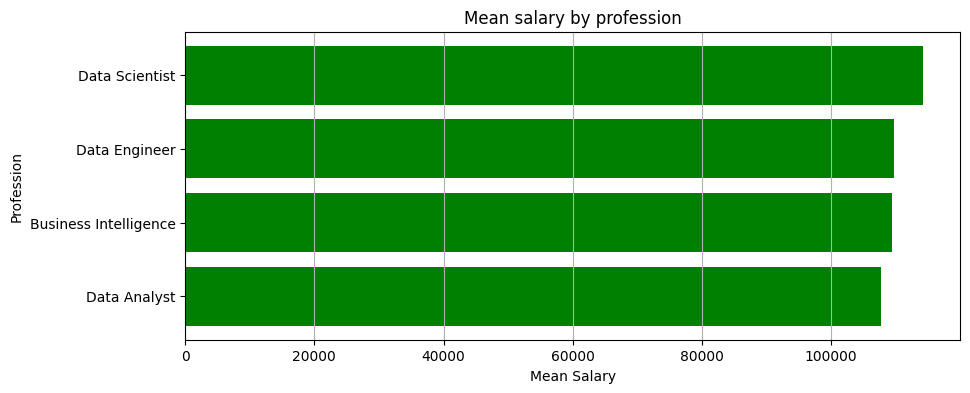

In [30]:
#This groups for job position and calculates the mean salary of each job positon/profession
salaries_profession = df.groupby('title')['salary'].mean().sort_values()

plt.figure(figsize=(10, 4))

plt.barh(salaries_profession.index, salaries_profession.values, color='green')
plt.xlabel('Mean Salary')
plt.ylabel('Profession')
plt.title('Mean salary by profession')
ticks = plt.xticks()
plt.grid(axis='x')

plt.show()

In [31]:
#This line of code converts the first letter to uppercase, counts the quantity of values for each job modality, and sorts the values for the next graph

job_type = df['onsite_remote'].str.capitalize().value_counts().sort_values()

job_type

onsite_remote
Remote    848
Hybrid    950
Onsite    975
Name: count, dtype: int64

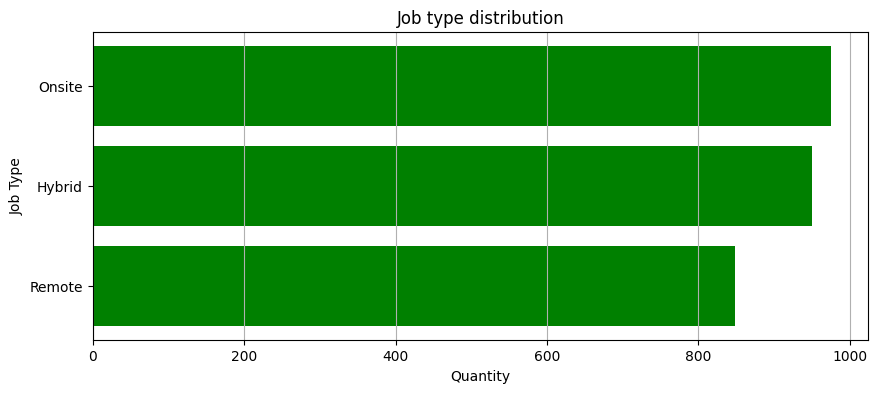

In [32]:
#Graph about the Job Type distribution
plt.figure(figsize=(10, 4))

plt.barh(job_type.index, job_type.values, color='green')
plt.xlabel('Quantity')
plt.ylabel('Job Type')
plt.title('Job type distribution')
ticks = plt.xticks()
plt.grid(axis='x')

plt.show()

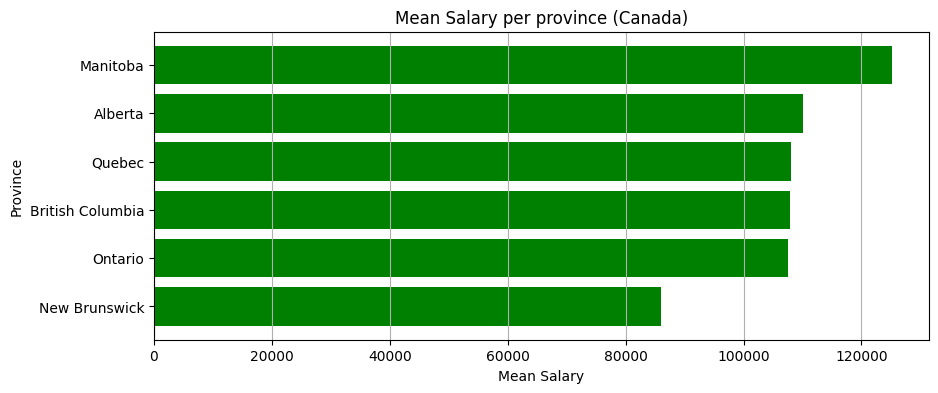

In [33]:
#Groups the mean salary per location, and sorts the values
graph = df.groupby('location')['salary'].mean().sort_values()

plt.figure(figsize=(10, 4))
plt.barh(graph.index, graph.values, color='green')
plt.xlabel('Mean Salary')
plt.ylabel('Province')
plt.title('Mean Salary per province (Canada)')
plt.grid(axis='x')
ticks = plt.xticks()

plt.show()

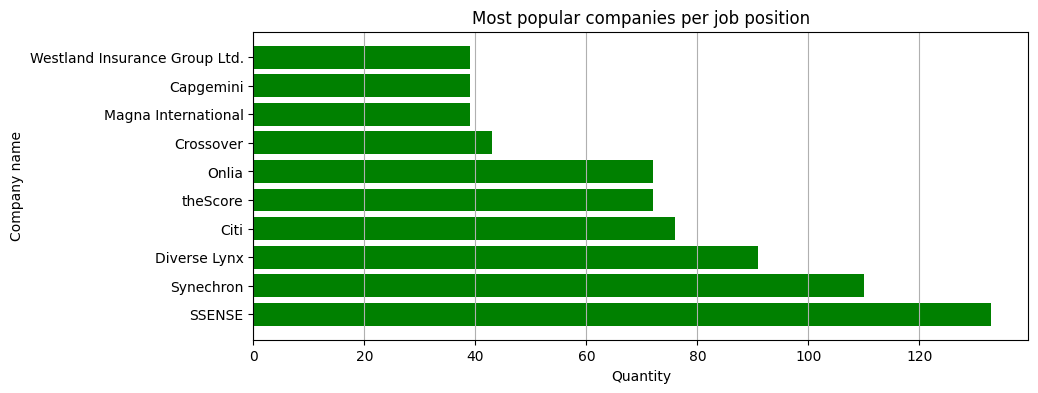

In [34]:
#Groups and counts how many professionals of each job positions are in each company, sorts the values in descending order and then limit the amount that will be shown to 10
companies = df.groupby('company')['title'].count().sort_values(ascending=False)[:10]

plt.figure(figsize=(10, 4))
plt.barh(companies.index, companies.values, color='green')
plt.xlabel('Quantity')
plt.ylabel('Company name')
plt.title('Most popular companies per job position')
plt.grid(axis='x')

plt.show()

In [35]:
#Vefify NaN values in the ['posted_date'] column
nan_dates = df['posted_date'].isna().any()

nan_dates

False

In [36]:
print(df['posted_date'].unique())

['2022-10-24' '2022-11-18' '2022-11-17' '2022-11-08' '2022-11-15'
 '2022-11-02' '2022-11-09' '2022-10-27' '2022-11-11' '2022-11-16'
 '2022-11-22' '2022-10-26' '2022-11-10' '2022-11-21' '2022-10-19'
 '2022-11-13' '2022-11-03' '2022-10-12' '2022-09-21' '2022-10-23'
 '2022-11-01' '2022-10-07' '2022-11-19' '2022-10-21' '2022-11-04'
 '2022-10-14' '2022-07-18' '2022-09-29' '2022-09-28' '2022-10-02'
 '2022-11-20' '2022-11-05' '2022-11-23' '2022-10-25' '2022-09-18'
 '2022-11-14' '2022-10-31' '2022-10-20' '2022-05-13' '2022-10-17'
 '2022-10-10' '2022-10-28' '2022-10-16' '2022-11-07' '2022-10-05'
 '2022-10-13']
